**CS108 FINAL PROJECT**
this is our final project

In [82]:
import pandas as pd
import numpy as np
df= pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban   

**DATA VISUALIZATIONS**

df.describe()

In [83]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Distribution of gender

<AxesSubplot: >

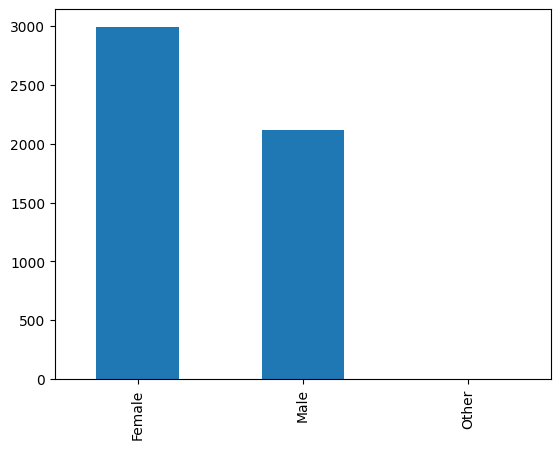

In [85]:

df['gender'].value_counts().plot(kind='bar')


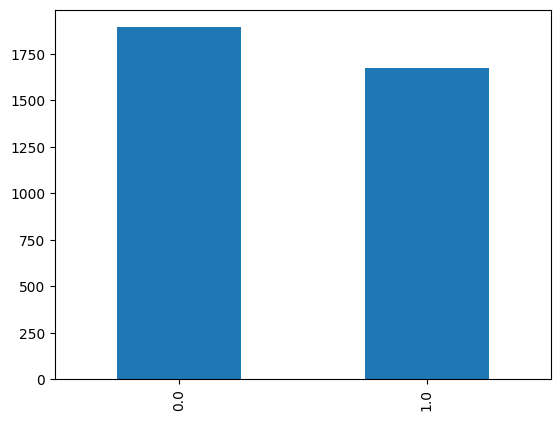

In [89]:
import math
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 1, 'Unknown': math.nan})
df['smoking_status'].value_counts().plot(kind='bar')
df2=df
#for cleanup, make unknowns into nan
#make formerly smoked and never smoked into 0
#df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = np.nan
#make smokes into yes

<AxesSubplot: >

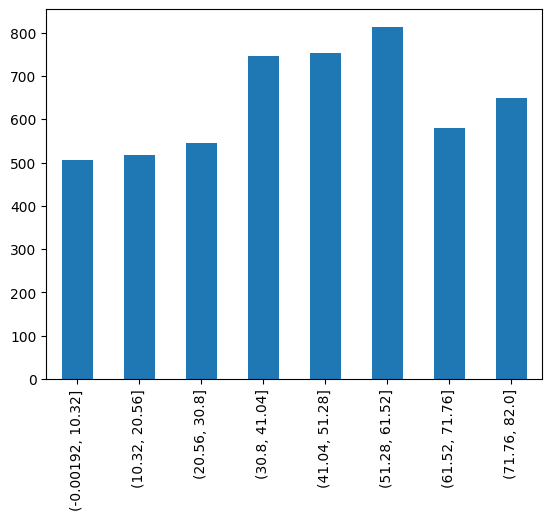

In [75]:
#df.loc[df['age'].between(0,10,'both')]= '0-10'

#maybe combine with a groupby
ddf=df
ddf['age'] = pd.cut(ddf['age'], 8)
ddf['age'].value_counts(sort=False).plot(kind='bar')

the majority of the people in this datset are between 30 and 60 years of age, as indicated by the graph

<BarContainer object of 5110 artists>

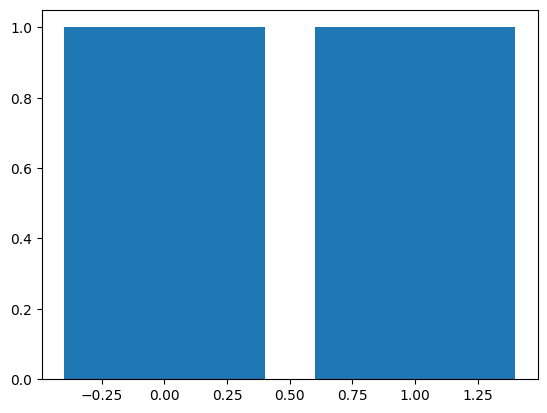

In [90]:
#np.corrcoef(df['age'],df['stroke'])

from matplotlib import pyplot as plt
import seaborn as sns
x=ddf['smoking_status']
y=ddf['stroke']
plt.bar(x,y)
#ddf.corr()
#plt.show()

C:\Users\alpha\AppData\Local\Temp\ipykernel_14452\1733774677.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ddf.corr())


<AxesSubplot: >

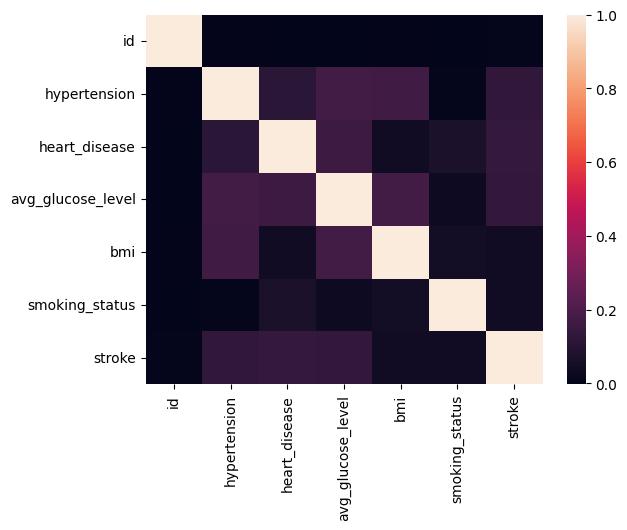

In [77]:
sns.heatmap(ddf.corr())

as is seen in the heatmap, the variables with the strongest correlation with having a stroke are Hypertension, Heart Disease, and a high glucose level, though none of them have a strong correlation

In [56]:
df=df.sort_values('age',ascending=True)
df.head()
#i just wanted to check to see that there was no negative ages in this dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,False,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,False,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,False,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,False,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,False,0


In [102]:
hmap = (
    ddf
    .groupby('stroke')
    .age
    .value_counts()
    .unstack()
)

<AxesSubplot: xlabel='age', ylabel='stroke'>

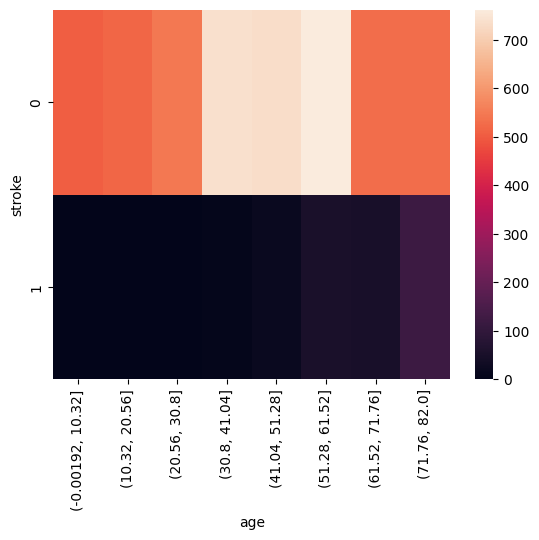

In [103]:
sns.heatmap(hmap)

While this heatmap is a bit of a pain to read, it can be seen that the highest rates of strokes happen as the people get older, which is visible at the bottom right of the heatmap. the rates rise from near zero to between 200-300 in this particular dataset when we get to the 70-82 age range

In [104]:
hmap = (
    ddf
    .groupby('stroke')
    .ever_married
    .value_counts()
    .unstack()
)

<AxesSubplot: xlabel='ever_married', ylabel='stroke'>

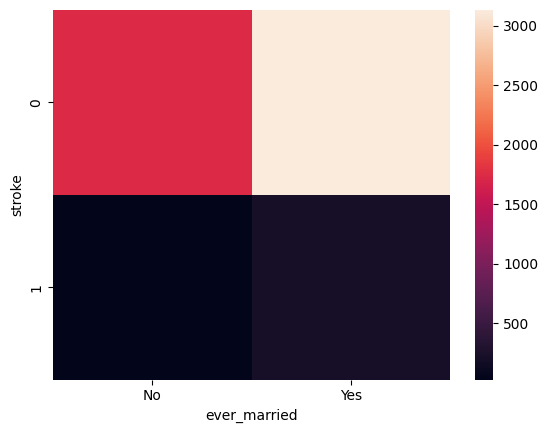

In [105]:
sns.heatmap(hmap)

there is a slight correlation between marital status and strokes, but that could just be a coincidence